In [1]:
#Setting up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
def setmissingvalues(df1,df2,n):
    """ This function replaces nan values of foreign tourists in sl no and place columns which arises due to format 
    issues with source. It takes the foreign tourists dataframe as first argument, the domestic one as second and the 
    last number of domestic df index as third. Returns modified dataframe."""
    i=0
    while i<=n:
        df1.loc[i+1,'PLACE']=df2.loc[i,'PLACE']
        df1.loc[i+1,'SL. NO.']=df2.loc[i,'SL. NO.']
        i=i+2
    return df1

In [3]:
def cleaning_df(df1):
    #Splitting dataframes for cleaning purposes
    dom=df1[df1['TOURIST']=='DOMESTIC']
    fore=df1[df1['TOURIST']=='FOREIGN']
    fore=setmissingvalues(fore,dom,dom.index[-1])
    #Merging dataframes:
    tour=pd.merge(dom,fore,'inner',on=['PLACE','SL. NO.'])
    for col in tour.columns:
        if '_x' in col:
            tour[col[:-2]]=tour[col]+tour[(col[:-2]+'_y')]
    for col in tour.columns:
        if '_x' in col or '_y' in col:
            tour.drop(col,axis=1,inplace=True)
    return tour
    

In [4]:
#Cleaning and formatting tourist data

#2019
tour_2019=pd.read_excel(r'C:\Users\User\Downloads\TIC wise tourist data 2019_final.xlsx')
tour_2019.rename(columns={'SL.\nNO.':'SL. NO.'},inplace=True)
tour_2019=cleaning_df(tour_2019)

#2018
tour_2018=pd.read_excel(r'C:\Users\User\Downloads\Monthly Staticts -2018.xlsx')
tour_2018=cleaning_df(tour_2018)

#2017
tour_2017=pd.read_excel(r'C:\Users\User\Downloads\Monthly Staticts of Dom and for final-2017.xlsx')
tour_2017=cleaning_df(tour_2017)

#2016
tour_2016=pd.read_excel(r'C:\Users\User\Downloads\2016.xlsx')
tour_2016=cleaning_df(tour_2016)

#2015
tour_2015=pd.read_excel(r'C:\Users\User\Downloads\Staticts2015.xlsx')
tour_2015=cleaning_df(tour_2015)

#annual data from 2011-2014:
tour_2014=pd.read_excel(r'C:\Users\User\Downloads\2010 & 2011&2012.xlsx')
tour_2014.rename(columns={'SL.NO':'SL. NO.','PLA CE':'PLACE'},inplace=True)
tour_2014=tour_2014.dropna(axis=0,how='all').reset_index().drop('index',axis=1)
tour_2014=cleaning_df(tour_2014)
tour_2014=tour_2014[['SL. NO.','PLACE','2011','2012','2013','2014']]
tour_2014['TOTAL']=tour_2014['2011']+tour_2014['2012']+tour_2014['2013']+tour_2014['2014']
tour_2015

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SL. NO.,PLACE,TOURIST,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,1,PATNA,DOMESTICFOREIGN,394726.0,359241.0,336911.0,261602.0,154850.0,183096.0,177890.0,189158.0,165966.0,199084.0,201933.0,212361.0,2836818
1,2,GAYA,DOMESTICFOREIGN,435262.0,273478.0,186268.0,163380.0,132945.0,139303.0,212752.0,111917.0,295118.0,938506.0,463289.0,587625.0,3939843
2,3,BODHGAYA,DOMESTICFOREIGN,193265.0,159090.0,190011.0,115705.0,137209.0,113266.0,151445.0,123384.0,134777.0,343132.0,151235.0,175622.0,1988141
3,4,RAJGIR,DOMESTICFOREIGN,671095.0,129601.0,125081.0,78331.0,60650.0,972835.0,1645499.0,68885.0,156330.0,128675.0,247650.0,263271.0,4547903
4,5,NALANDA,DOMESTICFOREIGN,147706.0,69055.0,69633.0,48339.0,26211.0,28904.0,169493.0,30063.0,46204.0,68978.0,179800.0,181675.0,1066061
5,6,RAXUAL,DOMESTICFOREIGN,44078.0,34077.0,49029.0,41815.0,41679.0,39804.0,48950.0,52919.0,56191.0,39192.0,46509.0,41175.0,535418
6,7,MUNGER,DOMESTICFOREIGN,8240.0,7225.0,7690.0,11035.0,7045.0,9886.0,9230.0,6486.0,6975.0,9495.0,9888.0,12370.0,105565
7,8,VAISHALI,DOMESTICFOREIGN,93864.0,47503.0,55955.0,111649.0,57259.0,57564.0,65386.0,75942.0,66981.0,70211.0,80313.0,82088.0,864715
8,9,MUZAFFARPUR,DOMESTICFOREIGN,74214.0,53773.0,50412.0,50880.0,41091.0,34812.0,38753.0,314245.0,47832.0,43915.0,45802.0,46101.0,841830
9,10,BAGHALPUR,DOMESTICFOREIGN,40300.0,42700.0,45825.0,51590.0,50310.0,63578.0,345230.0,178077.0,59525.0,54560.0,49206.0,55220.0,1036121


In [5]:
#Creating dataframe containing annual total number of tourists for years 2011-2014
bef_2015=pd.DataFrame([tour_2014.loc[tour_2014.index[-1],'2012'],tour_2014.
                       loc[tour_2014.index[-1],'2013'],tour_2014.loc[tour_2014.index[-1],'2014'],tour_2015.loc[tour_2015.index[-1],'TOTAL']],
                       columns=['TOTAL'],index=['2012','2013','2014','2015'])
#Creating dataframe containing total annual tourists for 2015-2019
aft_2015=pd.DataFrame([tour_2016.loc[tour_2016.index[-1],'TOTAL'],
        tour_2017.loc[tour_2017.index[-1],'TOTAL'],tour_2018.loc[tour_2018.index[-1],'TOTAL'],
        tour_2019.loc[tour_2019.index[-1],'TOTAL']],columns=['TOTAL'],index=['2016','2017','2018','2019'])
aft_2015

#Combining into the df for use of showing total number of tourists
fdf=pd.merge(bef_2015,aft_2015,'outer',)
fdf['YEAR']=['2012','2013','2014','2015','2016','2017','2018','2019']
fdf.set_index('YEAR',inplace=True)
fdf

,TOTAL
YEAR,
2012,22544032.0
2013,22354141.0
2014,23373885.0
2015,28952855.0
2016,29526658.0
2017,33496768.0
2018,34709584.0
2019,35083179.0


<IPython.core.display.Javascript object>


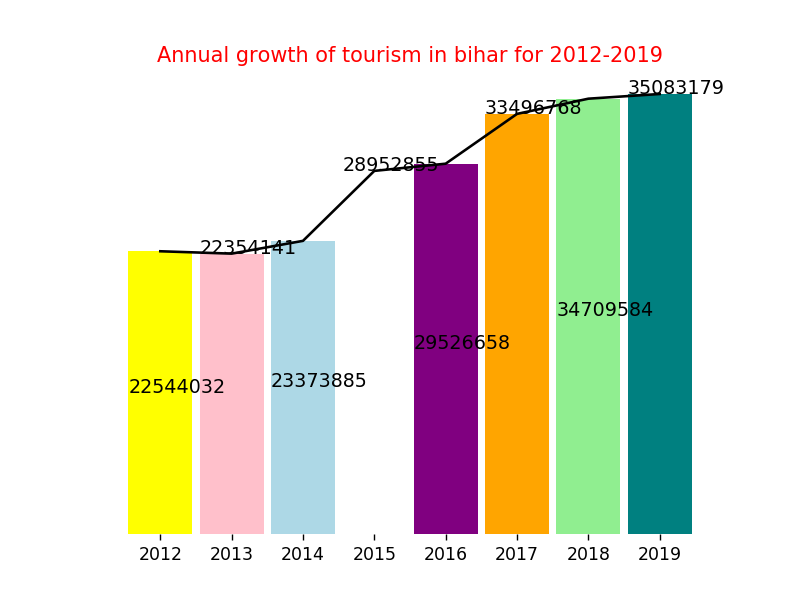

In [6]:
#Creating bar chart for before 2015
plt.figure()
bars=plt.bar(fdf.index,fdf['TOTAL'],width=0.9,color=['yellow','pink','lightblue','white','purple','orange',
                                                     'lightgreen','teal'])
plt.gca().text(x=bars[0].get_x(),y=bars[0].get_height()/2,s=str(int(bars[0].get_height())),color='k',fontsize=11)
plt.gca().text(x=bars[1].get_x(),y=bars[1].get_height(),s=str(int(bars[1].get_height())),color='k',fontsize=11)
plt.gca().text(x=bars[2].get_x(),y=bars[2].get_height()/2,s=str(int(bars[2].get_height())),color='k',fontsize=11)
plt.gca().text(x=bars[3].get_x(),y=bars[3].get_height(),s=str(int(bars[3].get_height())),color='k',fontsize=11)
plt.gca().text(x=bars[4].get_x(),y=bars[4].get_height()/2,s=str(int(bars[4].get_height())),color='k',fontsize=11)
plt.gca().text(x=bars[5].get_x(),y=bars[5].get_height(),s=str(int(bars[5].get_height())),color='k',fontsize=11)
plt.gca().text(x=bars[6].get_x(),y=bars[6].get_height()/2,s=str(int(bars[6].get_height())),color='k',fontsize=11)
plt.gca().text(x=bars[7].get_x(),y=bars[7].get_height(),s=str(int(bars[7].get_height())),color='k',fontsize=11)
plt.plot(fdf['TOTAL'],'-',color='black')


In [7]:
#Enhancing visualisation

#Removing frames
ax=plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.xaxis.set_visible(True)
ax.yaxis.set_ticks([])

#Adding insightful information
plt.title('Annual growth of tourism in bihar for 2012-2019',color='red')

Text(0.5, 1, 'Annual growth of tourism in bihar for 2012-2019')

In [ ]:
def remove_spines()